# Create plots for panels used in figure 4

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import pandas as pd
import dclab
import warnings
warnings.filterwarnings('ignore')

In [ ]:
result_folder = r"C:\Users\freiche\ownCloud\PhD\Projects\ChAc\result_data\RTDC\RTfDC"

In [ ]:
color_dict = {'VS': 'C0', 'VL': 'C1', 'RS': 'C2',
              'KM': 'C3', 'LM': 'C4'}

In [ ]:
data_LM_9w_RBC = {'date': '2017-11-07','events': 19455, 'flow rate': 0.02, '% gated': 88.4278,
                     'median area_um': 41.7316, 'mean area_um': 41.733, 'sd area_um': 3.67772,
                     'median deform': 0.180168, 'mean deform': 0.178471, 'sd deform': 0.0270663}

data_LM_9w_reti = {'date': '2017-11-07','events': 1088, 'flow rate': 0.02, '% gated': 5.59239,
                     'median area_um': 43.0032, 'mean area_um': 42.8963, 'sd area_um': 3.90582,
                     'median deform': 0.169558, 'mean deform': 0.170496, 'sd deform': 0.029235}

rbc_ctrl_medians = {'area_um': 34.62220001220703, 'deform': 0.26245954632759094}

In [5]:
def plot_errbars(patients, labels, y_value, fontsize= 20):

    flow_rate = 0.02
    linewidth = 8
    markersize = 18
    #errorbar formatting
    errbar_width = 8

    with sns.axes_style('darkgrid'):
        fig = plt.figure(0,(12,8))
        ax1 = plt.subplot(111)

        ax_xlabel = "Days since treatment start"
        ax_ylabel = dclab.dfn.feature_name2label[y_value]

        ax1.set_xlabel(ax_xlabel, fontsize=fontsize+2)
        ax1.set_ylabel(ax_ylabel, fontsize=fontsize+2)

        for ind, patient in enumerate(patients):

            result_file = "20200527_results_RTfDC_" + patient + ".tsv"
            result_path = os.path.join(result_folder, result_file)

            df = pd.read_csv(result_path, sep='\t')

            df_date_grouped_mean = df.groupby(['date', 'flow rate']).median().reset_index()
            df_date_grouped_std = df.groupby(['date', 'flow rate']).std().reset_index()

            dates = pd.to_datetime(df_date_grouped_mean.reset_index()['date'])
            day0=dates[0]

            time = dates - day0

            df_date_grouped_mean['delta_days'] = time.dt.days #convert datetime in ns to days
            df_date_grouped_std['delta_days'] = time.dt.days

            color = color_dict[patient]

            #flow rate range from 0.004 - 0.02 ul/s
            ii = np.round(df_date_grouped_mean['flow rate'], 3) == flow_rate
            x = df_date_grouped_mean['delta_days'][ii]
            y = df_date_grouped_mean[y_value][ii]
            yerr = df_date_grouped_std[y_value][ii]

            x = np.array(x)
            y = np.array(y)
            yerr = np.array(yerr)

            if patient=='LM':
                date_LM_9w = pd.to_datetime(data_LM_9w_RBC['date'])
                time_LM_9w = (date_LM_9w - day0).days

                y_LM_9w = data_LM_9w_RBC['median ' + y_value]
                yerr_LM_9w = data_LM_9w_RBC['sd ' + y_value]

                x = np.insert(x,1,time_LM_9w)
                y = np.insert(y,1,y_LM_9w)
                yerr = np.insert(yerr,1,yerr_LM_9w)

                ax1.errorbar(x[:-2],y[:-2], yerr=yerr[:-2], ls='-', lw=linewidth, marker='o', c=color, ecolor='gray',
                             markersize = markersize, elinewidth=errbar_width, label = labels[ind])
                ax1.errorbar(x[-3:],y[-3:], yerr=yerr[-3:], ls='--', lw=linewidth, marker='o', c=color, ecolor='gray',
                             markersize = markersize, elinewidth=errbar_width)
            else:
                ax1.errorbar(x[:-1],y[:-1], yerr=yerr[:-1], ls='-', lw=linewidth, marker='o', c=color, ecolor='gray',
                             markersize = markersize, elinewidth=errbar_width, label = labels[ind])
                ax1.errorbar(x[-2:],y[-2:], yerr=yerr[-2:], ls='--', lw=linewidth, marker='o', c=color, ecolor='gray',
                             markersize = markersize, elinewidth=errbar_width)

        ax1.axhline(rbc_ctrl_medians[y_value], c='darkgray', alpha=.75, ls='--', lw=1.5*linewidth,
                    zorder=0, label='CTRL')
        ax1.legend(fontsize=fontsize-4, ncol=2)
        ax1.tick_params(axis='both', labelsize=fontsize-2)
        #set alpha of errorbars
        for collection in ax1.collections:
            collection.set_alpha(.5)

    return fig, ax1

## A

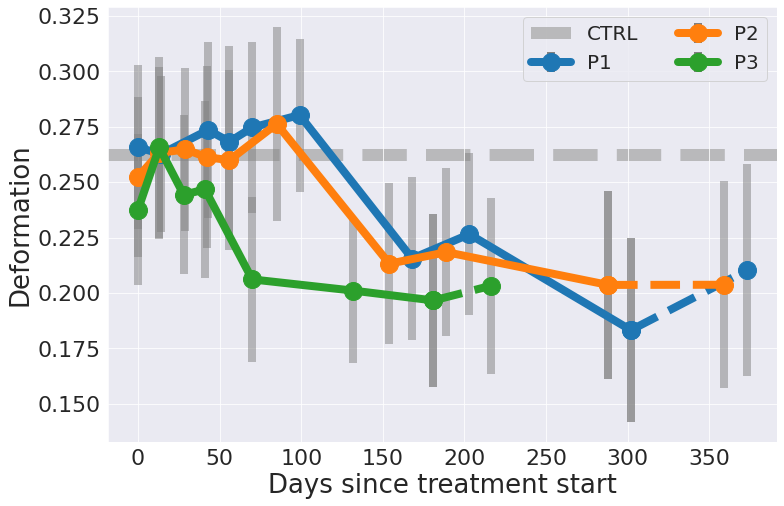

In [6]:
patients = ['VS', 'VL', 'RS']
labels = ['P1', 'P2', 'P3']
y_value = 'deform'

fig, ax = plot_errbars(patients, labels, y_value, fontsize=24)

In [7]:
save_name = "RBC_dasatinib_deform"
savefolder = r"C:\Users\freiche\ownCloud\PhD\Projects\ChAc\manuscript\figures\plots\RTfDC_RBCs"
savepath = os.path.join(savefolder,save_name)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

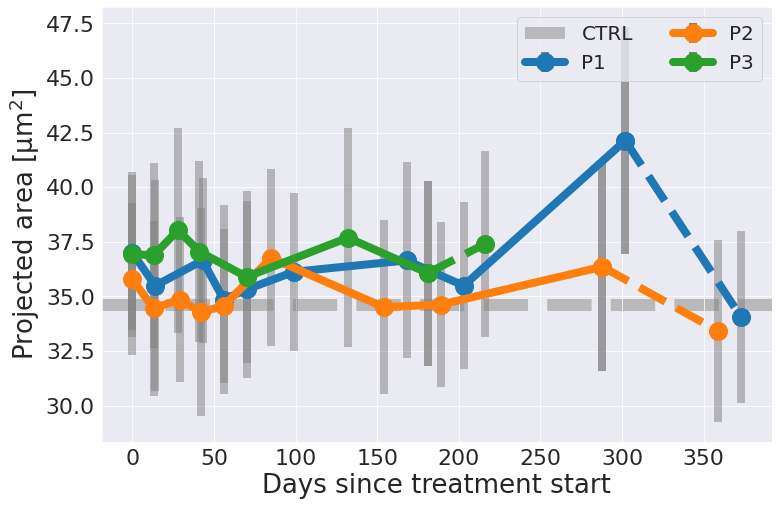

In [8]:
patients = ['VS', 'VL', 'RS']
labels = ['P1', 'P2', 'P3']
y_value = 'area_um'

fontsize=24
fig, ax = plot_errbars(patients, labels, y_value, fontsize=fontsize)
ax.set_ylabel(r"Projected area [µm$^2$]", fontsize=fontsize+2)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

In [9]:
save_name = "RBC_dasatinib_area"
savefolder = r"C:\Users\freiche\ownCloud\PhD\Projects\ChAc\manuscript\figures\plots\RTfDC_RBCs"
savepath = os.path.join(savefolder,save_name)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

## C

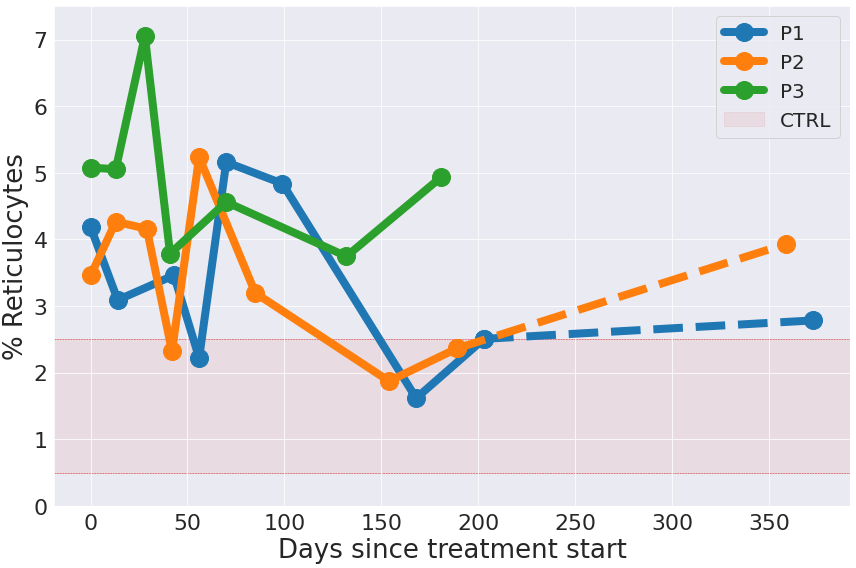

In [10]:
patients = ['VS', 'VL', 'RS']
labels = ['P1', 'P2', 'P3']

flow_rate1 = 0.02

fontsize= 24
linewidth = 8
markersize = 18
#errorbar formatting
markerwidth = 12
errbar_width = 8

linealpha = 1

with sns.axes_style('darkgrid'):
    plt.figure(0,(12,8))
    ax1 = plt.subplot(111)

    ax_xlabel = "Days since treatment start"
    ax_ylabel = "% Reticulocytes"

    ax1.set_xlabel(ax_xlabel, fontsize=fontsize+2)
    ax1.set_ylabel(ax_ylabel, fontsize=fontsize+2)
    #     ax1.set_title("flow rate = {} ul/s".format(flow_rate1), fontsize=fontsize)

    for ind, patient in enumerate(patients):

        result_file = "20200527_results_RTfDC_" + patient + ".tsv"
        result_path = os.path.join(result_folder, result_file)

        df = pd.read_csv(result_path, sep='\t')
        dates_uniq = df.date.unique()
        date_datetime = pd.to_datetime(dates_uniq).sort_values()
        day0 = date_datetime[0]

        times1 = []
        percent_retis1 = []

        for date in date_datetime:
            df_date = df[pd.to_datetime(df['date'])==date]
            ii = np.round(df_date['flow rate'], 3) == flow_rate1
            df_fl1 = df_date[ii]

            date = pd.to_datetime(date)
            time = (date-day0).days #convert datetime in ns to days

            #check if data exists for this date and if only nan values are in
            #'syto13_pos' column
            if len(df_fl1)>0 and not (df_fl1['syto13_pos'].isnull().sum() == len(df_fl1)):
                percent_reti1 = len(df_fl1[df_fl1['syto13_pos']==True])/len(df_fl1)
                times1.append(time)
                percent_retis1.append(percent_reti1*100)

        color = color_dict[patient]

        if patient=='RS':
            ax1.plot(times1, percent_retis1, 'o', c=color, ls='-', label=labels[ind], lw=linewidth,
                     alpha=linealpha, markersize = markersize)
        else:
            ax1.plot(times1[:-1], percent_retis1[:-1], 'o', c=color, ls='-', label=labels[ind], lw=linewidth,
                     alpha=linealpha, markersize = markersize)
            ax1.plot(times1[-2:], percent_retis1[-2:], 'o', c=color, ls='--', lw=linewidth,
                     alpha=linealpha, markersize = markersize)

    ax1.axhline(0.5, ls='--', lw=.5, c='tab:red', zorder=0)
    ax1.axhline(2.5, ls='--', lw=.5, c='tab:red', zorder=0)
    axis_limits = ax1.get_xlim()
    ax1.add_patch(patches.Rectangle((axis_limits[0], 0.5), np.diff(axis_limits), 2,
                                    color='tab:red', alpha=0.075, zorder=0,
                                    label = 'CTRL')
                  )

    ax1.tick_params(axis='both', labelsize=fontsize-2)
    ax1.legend(fontsize=fontsize-4)
    ax1.set_ylim(0,7.5)
    plt.tight_layout()

    savefolder = r"C:\Users\freiche\ownCloud\PhD\Projects\ChAc\manuscript\figures\plots\RTfDC_RBCs"
    savename = r"RBC_dasatinib_reti_number"
    savepath = os.path.join(savefolder,savename)

    plt.savefig(savepath+".pdf", dpi=900, format='pdf')

## D

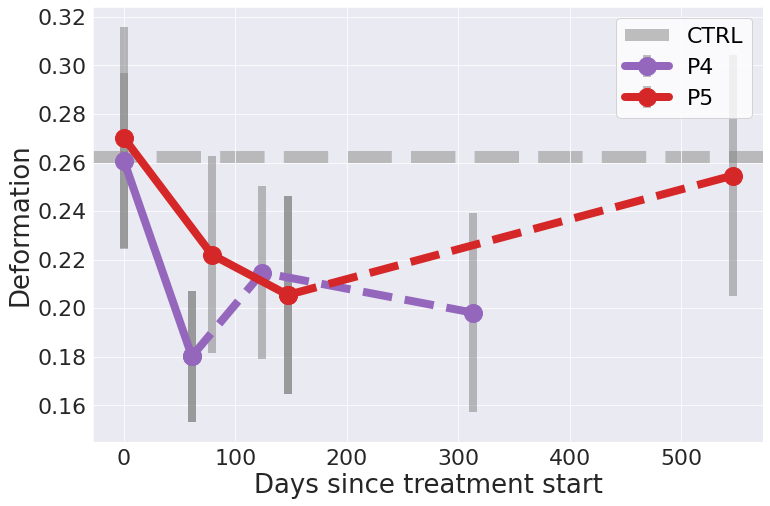

In [11]:
patients = ['LM', 'KM']
labels = ['P4', 'P5']
y_value = 'deform'

fontsize=24
fig, ax=plot_errbars(patients, labels, y_value, fontsize=fontsize)
plt.xlabel('Days since treatment start', fontsize=fontsize+2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, fontsize=fontsize-2, ncol=1)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

In [12]:
save_name = "RBC_lithium_deform"
savefolder = r"C:\Users\freiche\ownCloud\PhD\Projects\ChAc\manuscript\figures\plots\RTfDC_RBCs"
savepath = os.path.join(savefolder,save_name)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

## E

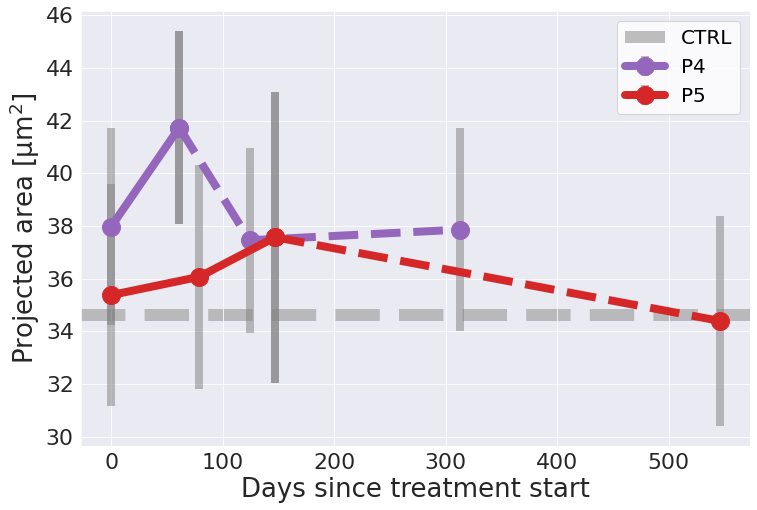

In [13]:
patients = ['LM', 'KM']
labels = ['P4', 'P5']
y_value = 'area_um'
fontsize=24

fig, ax = plot_errbars(patients, labels, y_value, fontsize=fontsize)
plt.xlabel('Days since treatment start', fontsize=fontsize+2)
plt.ylabel(r"Projected area [µm$^2$]", fontsize=fontsize+2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, fontsize=fontsize-4, ncol=1)
ax.yaxis.set_major_formatter(FormatStrFormatter('%i'))

In [14]:
save_name = "RBC_lithium_area"
savefolder = r"C:\Users\freiche\ownCloud\PhD\Projects\ChAc\manuscript\figures\plots\RTfDC_RBCs"
savepath = os.path.join(savefolder,save_name)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

## F

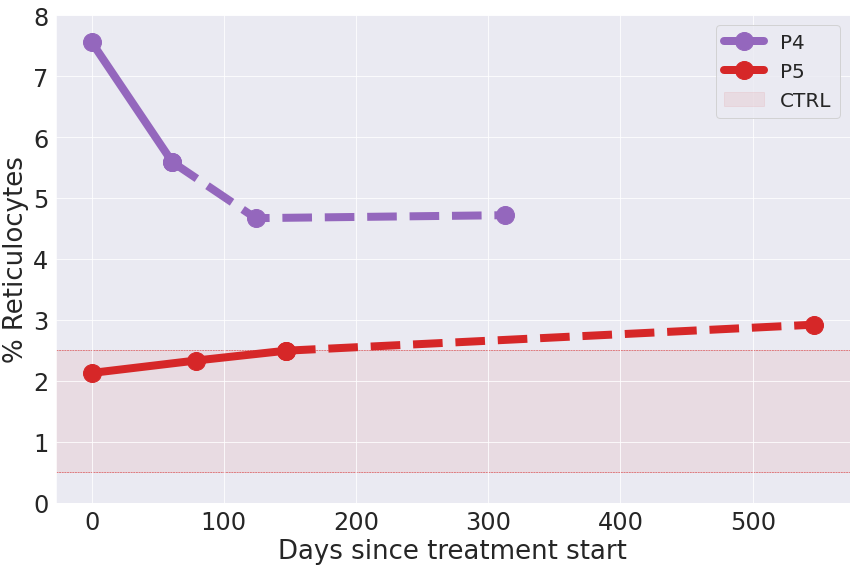

In [15]:
patients = ['LM', 'KM']
labels = ['P4', 'P5']

flow_rate1 = 0.02

fontsize= 24
linewidth = 8
markersize = 18
#errorbar formatting
markerwidth = 12
errbar_width = 8

with sns.axes_style('darkgrid'):
    plt.figure(0,(12,8))
    ax1 = plt.subplot(111)

    ax_xlabel = "Days since treatment start"
    ax_ylabel = "% Reticulocytes"

    ax1.set_xlabel(ax_xlabel, fontsize=fontsize+2)
    ax1.set_ylabel(ax_ylabel, fontsize=fontsize+2)
    #     ax1.set_title("flow rate = {} ul/s".format(flow_rate1), fontsize=fontsize)

    for ind, patient in enumerate(patients):

        result_file = "20200527_results_RTfDC_" + patient + ".tsv"
        result_path = os.path.join(result_folder, result_file)

        df = pd.read_csv(result_path, sep='\t')
        dates_uniq = df.date.unique()
        date_datetime = pd.to_datetime(dates_uniq).sort_values()
        day0 = date_datetime[0]

        times1 = []
        percent_retis1 = []

        for date in date_datetime:
            df_date = df[pd.to_datetime(df['date'])==date]
            ii = np.round(df_date['flow rate'], 3) == flow_rate1
            df_fl1 = df_date[ii]

            date = pd.to_datetime(date)
            time = (date-day0).days #convert datetime in ns to days

            #check if data exists for this date and if only nan values are in
            #'syto13_pos' column
            if len(df_fl1)>0 and not (df_fl1['syto13_pos'].isnull().sum() == len(df_fl1)):
                percent_reti1 = len(df_fl1[df_fl1['syto13_pos']==True])/len(df_fl1)
                times1.append(time)
                percent_retis1.append(percent_reti1*100)

        color = color_dict[patient]

        if patient=='LM':
            date_LM_9w_retis = pd.to_datetime(data_LM_9w_reti['date'])
            time_LM_9w_retis = (date_LM_9w_retis - day0).days
            percent_retis_9w_LM = data_LM_9w_reti['% gated']

            times1.insert(1, time_LM_9w_retis)
            percent_retis1.insert(1, percent_retis_9w_LM)

            ax1.plot(times1[:-2], percent_retis1[:-2], 'o', c=color, ls='-', label=labels[ind], lw=linewidth,
                     alpha=linealpha, markersize = markersize)
            ax1.plot(times1[-3:], percent_retis1[-3:], 'o', c=color, ls='--', lw=linewidth,
                     alpha=linealpha, markersize = markersize)
        else:
            ax1.plot(times1[:-1], percent_retis1[:-1], 'o', c=color, ls='-', label=labels[ind], lw=linewidth,
                     alpha=linealpha, markersize = markersize)
            ax1.plot(times1[-2:], percent_retis1[-2:], 'o', c=color, ls='--', lw=linewidth,
                     alpha=linealpha, markersize = markersize)

    ax1.axhline(0.5, ls='--', lw=.5, c='tab:red', zorder=0)
    ax1.axhline(2.5, ls='--', lw=.5, c='tab:red', zorder=0)
    axis_limits = ax1.get_xlim()
    ax1.add_patch(patches.Rectangle((axis_limits[0], 0.5), np.diff(axis_limits), 2,
                                    color='tab:red', alpha=0.075, zorder=0,
                                    label = 'CTRL')
                  )
    ax1.tick_params(axis='both', labelsize=fontsize)
    ax1.set_ylim(0,8)
    ax1.legend(fontsize=fontsize-4)
    plt.tight_layout()

    savefolder = r"C:\Users\freiche\ownCloud\PhD\Projects\ChAc\manuscript\figures\plots\RTfDC_RBCs"
    savename = r"RBC_lithium_reti_number"
    savepath = os.path.join(savefolder,savename)

    plt.savefig(savepath+".pdf", dpi=900, format='pdf')